In [10]:
import pandas as pd
from pandas import read_csv
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


df = read_csv('Clean_Dataset.csv')

In [11]:
# Initialize the LabelEncoder object
label_encoder = LabelEncoder()

# Encoding categorical features to numeric format if the column type is 'object'
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        df[column] = label_encoder.fit_transform(df[column])

# Separating the independent variables (X) and dependent variable (y)
X = df.drop(['price'], axis=1)  # Features
Y = df['price']  # Target variable

In [12]:


# Splitting the dataset into 70% training and 30% testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Display the shape of training and testing datasets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# Initialize the MinMaxScaler to scale the feature values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the training and testing sets with the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert scaled numpy arrays back to DataFrames for easier handling
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

(210107, 11) (90046, 11) (210107,) (90046,)


In [13]:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(actual_values, predicted_values):
    actual_values, predicted_values = np.array(actual_values), np.array(predicted_values)
    return np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

In [14]:
# Import necessary libraries for regression models and evaluation metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn import metrics
import numpy as np

# Initialize regression model objects with default settings
linear_reg = LinearRegression()  # Linear Regression model
decision_tree = DecisionTreeRegressor()  # Decision Tree Regressor model
bagging_reg = BaggingRegressor()  # Bagging Regressor model
random_forest = RandomForestRegressor()  # Random Forest Regressor model
support_vector = SVR()  # Support Vector Regressor model
xgboost_reg = xgb.XGBRegressor(tree_method='gpu_hist')  # XGBoost Regressor model
k_neighbors = KNeighborsRegressor(n_neighbors=5)  # K-Nearest Neighbors Regressor model
extra_trees = ExtraTreesRegressor()  # Extra Trees Regressor model

# List of all the regression models to iterate through
model_list = [linear_reg, decision_tree, random_forest, k_neighbors, extra_trees, xgboost_reg, bagging_reg]

# Loop through each model for training, prediction, and evaluation
for reg_model in model_list:
    
    # Train the model with the training dataset
    reg_model.fit(X_train, Y_train)

    # Make predictions using the testing dataset
    predictions = reg_model.predict(X_test)

    # Display the current model's name
    print(f'Model: {reg_model.__class__.__name__}')

    # Calculate and print evaluation metrics for each model
    mae = metrics.mean_absolute_error(Y_test, predictions)  # Mean Absolute Error
    mse = metrics.mean_squared_error(Y_test, predictions)  # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = metrics.r2_score(Y_test, predictions)  # R-Squared Score
    rmsle = np.log(np.sqrt(mse))  # Root Mean Squared Logarithmic Error
    mape = calculate_mape(Y_test, predictions)  # Mean Absolute Percentage Error
    
    # Output the calculated metrics
    print(f'MAE: {round(mae, 3)}')
    print(f'MSE: {round(mse, 3)}')
    print(f'RMSE: {round(rmse, 3)}')
    print(f'R2 Score: {round(r2, 6)}')
    print(f'RMSLE: {round(rmsle, 3)}')
    print(f'MAPE: {round(mape, 2)}%')

    # Adjusted R-squared calculation to account for the number of features
    adjusted_r2 = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
    print(f'Adjusted R2 Score: {round(adjusted_r2, 6)}')
    
    # Divider for clarity between models
    print('--------------------------------------------------')


Model: LinearRegression
MAE: 4623.77
MSE: 49049793.605
RMSE: 7003.556
R2 Score: 0.904696
RMSLE: 8.854
MAPE: 43.67%
Adjusted R2 Score: 0.904684
--------------------------------------------------
Model: DecisionTreeRegressor
MAE: 797.427
MSE: 7704986.038
RMSE: 2775.786
R2 Score: 0.985029
RMSLE: 7.929
MAPE: 5.4%
Adjusted R2 Score: 0.985027
--------------------------------------------------
Model: RandomForestRegressor
MAE: 805.038
MSE: 4806276.479
RMSE: 2192.322
R2 Score: 0.990661
RMSLE: 7.693
MAPE: 5.4%
Adjusted R2 Score: 0.99066
--------------------------------------------------
Model: KNeighborsRegressor
MAE: 1837.111
MSE: 14175762.538
RMSE: 3765.071
R2 Score: 0.972456
RMSLE: 8.234
MAPE: 11.11%
Adjusted R2 Score: 0.972453
--------------------------------------------------
Model: ExtraTreesRegressor
MAE: 828.815
MSE: 5321857.441
RMSE: 2306.915
R2 Score: 0.98966
RMSLE: 7.744
MAPE: 5.54%
Adjusted R2 Score: 0.989658
--------------------------------------------------


/home/admin/anaconda3/envs/Flight_Pred/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/admin/anaconda3/envs/Flight_Pred/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Model: XGBRegressor
MAE: 1597.875
MSE: 8385456.242
RMSE: 2895.765
R2 Score: 0.983707
RMSLE: 7.971
MAPE: 12.97%
Adjusted R2 Score: 0.983705
--------------------------------------------------
Model: BaggingRegressor
MAE: 839.748
MSE: 5312028.557
RMSE: 2304.784
R2 Score: 0.989679
RMSLE: 7.743
MAPE: 5.69%
Adjusted R2 Score: 0.989677
--------------------------------------------------


In [15]:
# Train the Extra Trees model with the training dataset
extra_trees.fit(X_train, Y_train)

# Predicting on the test dataset
predicted_values = extra_trees.predict(X_test)

# Creating a DataFrame to store actual and predicted values side by side
output_df = pd.DataFrame({'Actual_Price': Y_test, 'Predicted_Price': predicted_values})

# Merging the actual DataFrame with the newly created output DataFrame
result_merged = df.merge(output_df, left_index=True, right_index=True)

# Display a sample of 10 rows from the result DataFrame
result_merged[['Actual_Price', 'Predicted_Price']].sample(10).drop(columns=['Unnamed: 0'])

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Actual_Price,Predicted_Price
248083,248083,5,1496,0,4,0,5,2,0,12.17,42,57081,57081,63357.48
121828,121828,3,10,4,4,1,2,2,1,8.50,16,6542,6542,7629.37
79717,79717,1,797,5,1,0,2,1,1,11.92,19,4417,4417,4495.43
220974,220974,5,1559,2,4,0,1,3,0,21.50,34,51697,51697,51697.00
126480,126480,2,1108,4,0,0,5,2,1,11.00,43,6324,6324,6324.00
42492,42492,1,798,2,0,0,4,1,1,19.83,46,3988,3988,4041.30
126249,126249,1,842,4,0,0,0,2,1,22.33,42,5234,5234,5411.46
46344,46344,1,815,5,4,0,0,2,1,28.00,19,4158,4158,4289.25
201179,201179,3,409,1,4,0,0,4,1,5.42,36,4594,4594,5734.31
176641,176641,3,556,3,1,0,0,1,1,6.75,6,5986,5986,5059.63


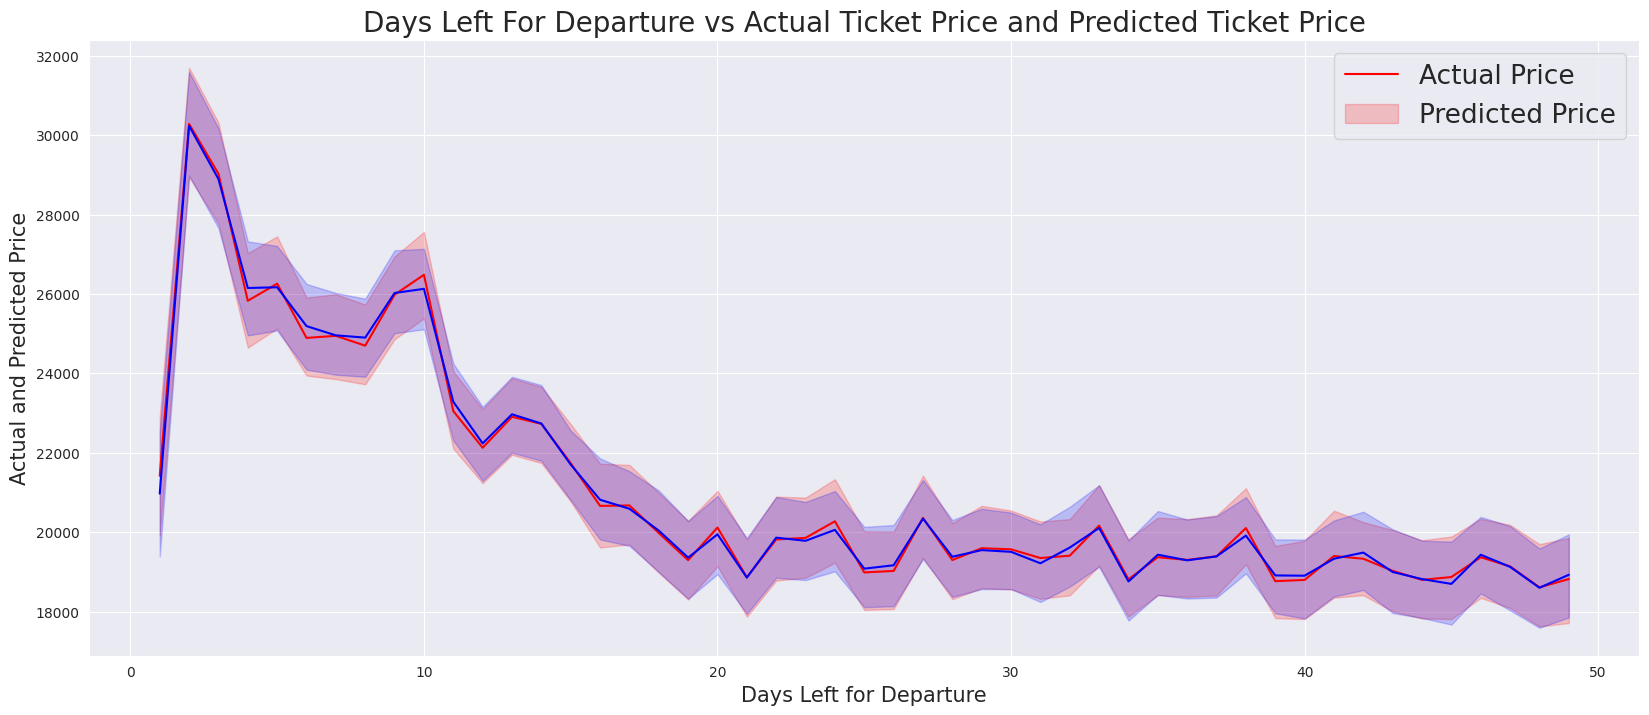

In [16]:
# Plot the comparison between actual and predicted prices over 'days_left'
plt.figure(figsize=(20, 8))

# Plotting the actual prices in red
sns.lineplot(data=result_merged, x='days_left', y='Actual_Price', color='red')

# Plotting the predicted prices in blue
sns.lineplot(data=result_merged, x='days_left', y='Predicted_Price', color='blue')

# Adding titles and labels to the plot
plt.title('Days Left For Departure vs Actual Ticket Price and Predicted Ticket Price', fontsize=20)
plt.legend(labels=['Actual Price', 'Predicted Price'], fontsize=19)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Actual and Predicted Price', fontsize=15)
plt.show()

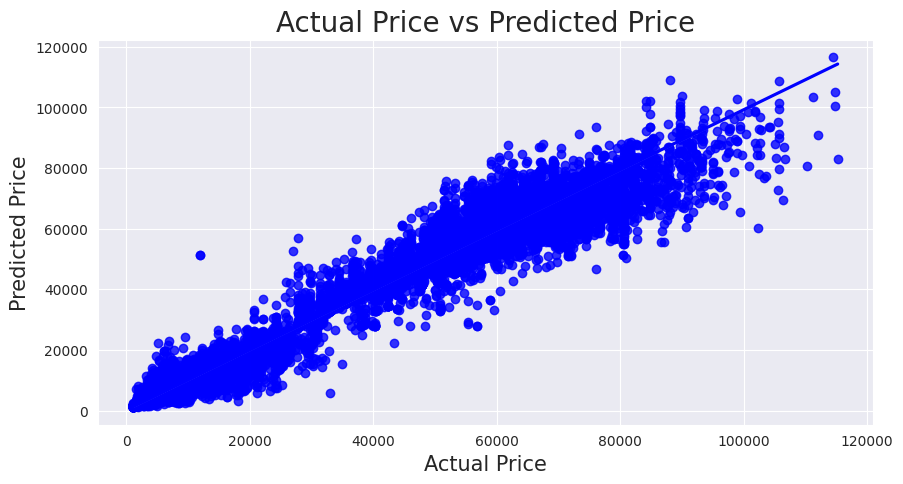

In [17]:
# Scatter plot for actual vs predicted price
plt.figure(figsize=(10, 5))

# Creating a regression plot to visualize correlation between actual and predicted prices
sns.regplot(x='Actual_Price', y='Predicted_Price', data=result_merged, color='blue')

# Adding titles and labels to the plot
plt.title('Actual Price vs Predicted Price', fontsize=20)
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.show()